In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\krist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\krist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('Dummy_data.csv')
df = df.drop(['customerid'],axis=1)
numerical = df.iloc[:,:3]
numerical.head()

,tenure,monthlycharges,totalcharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [3]:
# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(numerical)
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical.columns)
df= df.drop(columns=numerical.columns, axis = 1)
new_df = df.merge(right=scaled_numerical, how ="left", left_index = True, right_index = True)

In [4]:
X = new_df.drop(['churn_Yes'],axis=1)
y= new_df['churn_Yes']

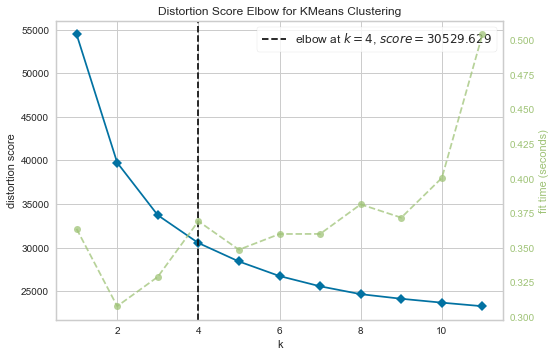

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show()

In [6]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(new_df)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

In [7]:
y_predicted = kmeans.fit_predict(X)
y_predicted

array([3, 3, 3, ..., 3, 1, 0])

In [8]:
new_df['cluster'] = y_predicted
new_df.head()

,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,onlinebackup_Yes,deviceprotection_Yes,techsupport_Yes,...,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges,cluster
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,-1.277445,-1.160323,-0.992611,3
1,1,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0.066327,-0.259629,-0.172165,3
2,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,-1.236724,-0.362660,-0.958066,3
3,1,0,0,0,0,0,1,0,1,1,...,1,0,1,0,0,0,0.514251,-0.746535,-0.193672,3
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,-1.236724,0.197365,-0.938874,1


In [9]:
new_df.to_csv("Clustered_data.csv", index=False, encoding="utf-8-sig")

In [10]:
print(kmeans.labels_[:20])
print(len(kmeans.labels_))

[3 3 3 3 1 1 1 3 1 0 3 2 0 0 1 0 2 0 3 1]
7043


In [11]:
kmeans.cluster_centers_

array([[ 5.00250376e-01,  1.96294442e-01,  7.07561342e-01,
         3.56034051e-01,  9.43415123e-01,  7.16074111e-01,
         5.68853280e-01,  7.01051577e-01,  7.10065098e-01,
         5.84376565e-01,  7.34601903e-01,  7.38107161e-01,
         6.83525288e-01,  3.67050576e-01,  6.32949424e-01,
        -9.99200722e-16,  2.02804206e-01,  3.29994992e-01,
         4.67200801e-01,  3.34001002e-01,  3.24486730e-01,
         2.68903355e-01,  7.26089134e-02,  1.12234490e+00,
         8.65097236e-01,  1.39017530e+00],
       [ 4.96187364e-01,  2.82679739e-01,  3.45860566e-01,
         1.55228758e-01,  1.00000000e+00,  5.00000000e-01,
         1.35076253e-01,  2.54901961e-01,  2.73965142e-01,
         1.44880174e-01,  4.28104575e-01,  4.29738562e-01,
         7.79411765e-01,  2.17864924e-03,  9.97821351e-01,
        -8.88178420e-16,  9.54793028e-01,  4.13943355e-02,
         3.81263617e-03,  1.37254902e-01,  1.26361656e-01,
         6.30174292e-01,  1.06209150e-01, -6.99242033e-01,
         6.73

In [12]:
kmeans.n_iter_

14

In [13]:
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 1684, 1: 1836, 0: 1997, 2: 1526})

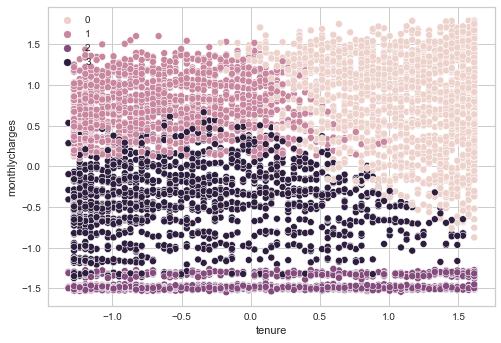

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=new_df, x="tenure", y="monthlycharges", hue=kmeans.labels_)
plt.show()

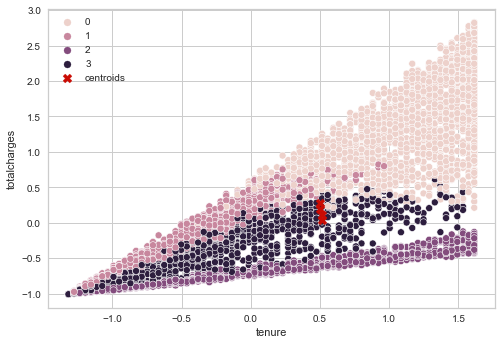

In [15]:
sns.scatterplot(data=new_df, x="tenure", y="totalcharges", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')

Explained variance ratio from PCA: [0.36854495 0.16800259]


In [17]:
principalDf

,principal component 1,principal component 2
0,-1.983775,-0.311142
1,-0.444578,0.708297
2,-1.639466,-0.524970
3,-0.230399,1.264952
4,-1.383547,-1.545712
...,...,...
7038,0.627107,-0.141041
7039,3.368525,0.319448
7040,-1.745177,0.109606
7041,-1.072184,-1.277028


In [18]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [19]:
finalDf

,principal component 1,principal component 2,churn_Yes
0,-1.983775,-0.311142,0
1,-0.444578,0.708297,0
2,-1.639466,-0.524970,1
3,-0.230399,1.264952,0
4,-1.383547,-1.545712,1
...,...,...,...
7038,0.627107,-0.141041,0
7039,3.368525,0.319448,0
7040,-1.745177,0.109606,0
7041,-1.072184,-1.277028,1


C:\Users\krist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


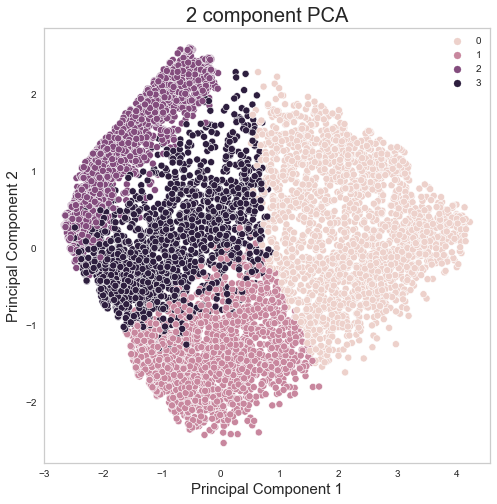

In [20]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

sns.scatterplot( finalDf['principal component 1']
            , finalDf['principal component 2']
            , hue = kmeans.labels_
            , s = 50)
ax.legend()
ax.grid()